In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
f = lambda x: x**2
x = np.arange(0, 21)
y = 1 + f(x) + np.random.normal(0, 10, 21)
coefs = np.polyfit(x, y, deg=2)

$MC(x) = \frac{c(x + \delta x) - c(x)}{\delta x}$

In [64]:
# method 1
avg_cost_per_extra_good = [
    np.polyval(coefs, good+1) - np.polyval(coefs, good) / (good - good+1) for good in x
    ]

# method 2
# avg_cost_per_good = lambda x: 2*x

avg_fixed_costs_f = lambda x: 1 / x
avg_variable_cost_f = lambda x: x**2 / x

/var/folders/rl/y69t95y51g90tvd6gjzzs59h0000gn/T/ipykernel_1126/1087225773.py:9: RuntimeWarning: divide by zero encountered in divide
  avg_fixed_costs_f = lambda x: 1 / x


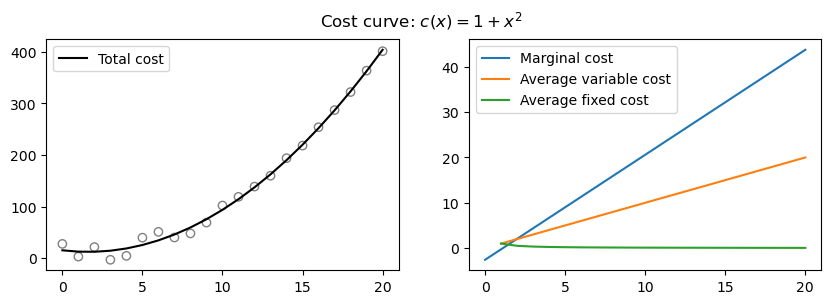

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

ax[0].scatter(x, y, color='grey', facecolor='none')
ax[0].plot(np.polyval(coefs, x), color='black', label='Total cost')
ax[0].legend()

ax[1].plot(x, avg_cost_per_extra_good, label='Marginal cost')
ax[1].plot(x[1:], avg_variable_cost_f(x[1:]), label='Average variable cost')
ax[1].plot(x, avg_fixed_costs_f(x), label='Average fixed cost')
ax[1].legend()

plt.suptitle('Cost curve: $c(x) = 1 + x^2$');